# SRTP project analysis Group 9 (Andaman)

### Name - Aditya Sengupta, Institute - AIAS, Amity University, Noida

### Mentor - Prof. Debasis D. Mohanty, CSIR-NEIST, Jorhat, Assam

Data obtained from the ISC catalogue at http://www.isc.ac.uk/iscbulletin/search/catalogue/ for the Andaman Region for the years 1980 to 2020 and for min magnitude $M_b$ = 0.1 to max magnitude $M_b$ = 10, where $M_b$ is the Body wave magnitude of the earthquake and for min. depth of 0 to max. depth of 6731 $\approx$ Radius of earth or $R_e$.

In [87]:
import pandas as pd 
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('seaborn-pastel')

import geopandas as gpd
from descartes import PolygonPatch
from matplotlib.animation import FuncAnimation
# from matplotlib.patches import Polygon

In [88]:
df = pd.read_csv('Andaman_data.csv')

In [89]:
df.head()

,year,month,date,Time,latitude,longitude,depth,magnitude,DATE
0,1980,2,21,16:05:50,10.5276,92.9652,78.7,4.6,1980-02-21
1,1980,5,26,11:37:30,11.0789,92.8553,43.2,4.8,1980-05-26
2,1980,8,20,6:21:54,11.0277,92.9682,54.0,5.0,1980-08-20
3,1980,9,29,0:18:31,13.0346,93.0987,32.0,4.5,1980-09-29
4,1980,10,31,8:01:10,12.2750,92.8534,41.0,4.6,1980-10-31


In [90]:
df.describe()

,year,month,date,latitude,longitude,depth,magnitude
count,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000,1759.000000
mean,2006.017624,6.469585,17.370665,12.217075,92.725736,25.825867,4.017112
std,6.697191,3.901819,9.060043,1.072680,0.445045,27.593395,0.543749
min,1980.000000,1.000000,1.000000,10.280000,91.900600,0.000000,2.900000
25%,2004.000000,3.000000,10.000000,11.174000,92.370050,0.000000,3.600000
50%,2005.000000,6.000000,17.000000,12.438400,92.749400,26.400000,3.900000
75%,2009.000000,10.000000,26.000000,13.137250,93.065350,32.450000,4.300000
max,2020.000000,12.000000,31.000000,13.727700,93.586700,291.600000,6.400000


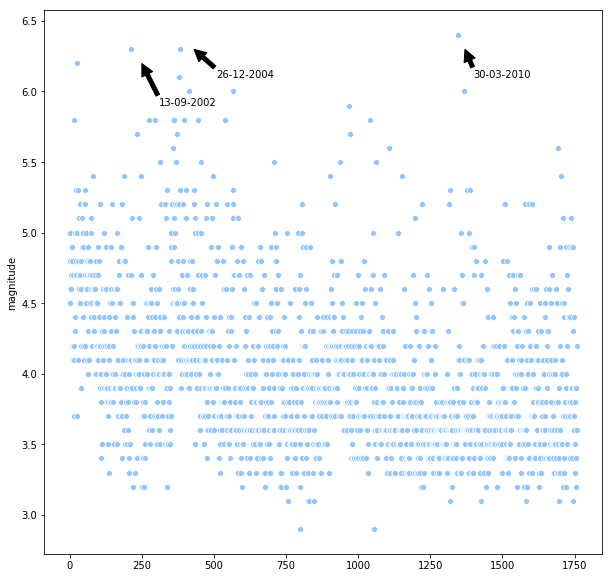

In [91]:
plt.figure(figsize=(10,10))
sns.scatterplot(y="magnitude", x=df.magnitude.index , data=df)
plt.annotate('30-03-2010', xy=(1370, 6.3), xytext=(1400, 6.1),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('26-12-2004', xy=(430, 6.3), xytext=(510, 6.1),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.annotate('13-09-2002', xy=(250, 6.2), xytext=(310, 5.9),arrowprops=dict(facecolor='black', shrink=0.01),)
plt.savefig('overall_earthquakes_andaman.png')

In [24]:
#group by magnitude counts
df_magnitude_count = pd.DataFrame(df.magnitude.groupby(df.magnitude).count())
df_magnitude_count['index'] = df_magnitude_count.index
df_magnitude_count.columns = ["Count","Magnitude"]

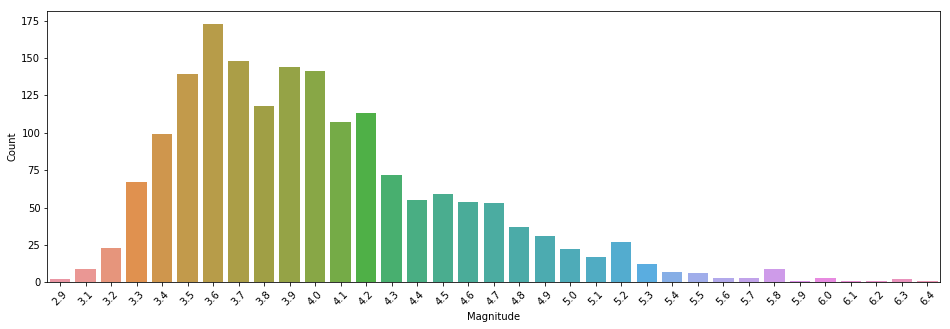

In [92]:
plt.figure(figsize=(16,5))
ax = sns.barplot(x="Magnitude", y="Count", data=df_magnitude_count)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.savefig('magnitude_count_andaman.png')

## Earthquake Magnitude classes

In [26]:
scale = []
for magnitude in df.magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        scale.append("Limited Damage")
    elif magnitude >=4.0 and magnitude <=4.9:
        scale.append("Minor Damage")
    elif magnitude >=5.0 and magnitude <=5.9:
        scale.append("Slight Damage")
    elif magnitude >=6.0 and magnitude <=6.9:
        scale.append("Severe Damage")
    elif magnitude >=7.0 and magnitude <=7.9:
        scale.append("Serious Damage")
    else:
        scale.append("Great Damage")

In [27]:
df['scale'] = scale

In [28]:
df_damage_count = pd.DataFrame(df.scale.groupby(df.scale).count().sort_values(ascending=False))
df_damage_count['percent'] = ((df_damage_count.scale)/sum(df_damage_count.scale))*100

Text(0.5, 0, 'Magnitude class')

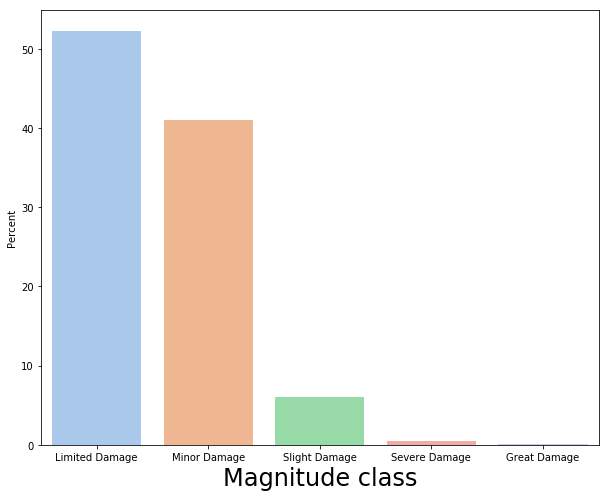

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(df_damage_count.index,df_damage_count.percent, palette="pastel")
# plt.xticks(df_damage_count.index, rotation= 10)
plt.ylabel('Percent')
plt.xlabel('Magnitude class', fontsize=24)

**Magnitude class size: "Great", "Major", "Strong", "Moderate", "Light", "Minor", "Less than 3.9")**

In [30]:
#array for storing the size_class
size_class = []

for magnitude in df.magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        size_class.append("Minor")
    elif magnitude >=4.0 and magnitude <=4.9:
        size_class.append("Light")
    elif magnitude >=5.0 and magnitude <=5.9:
        size_class.append("Moderate")
    elif magnitude >=6.0 and magnitude <=6.9:
        size_class.append("Strong")
    elif magnitude >=7.0 and magnitude <=7.9:
        size_class.append("Major")
    else:
        size_class.append("Great")

#Creating a column in the datafram called class_size
df['size_class'] = size_class

In [31]:
df_size_class = pd.DataFrame(df.size_class.groupby(df.size_class).count())
df_size_class['percent'] = ((df_size_class.size_class)/sum(df_size_class.size_class))*100

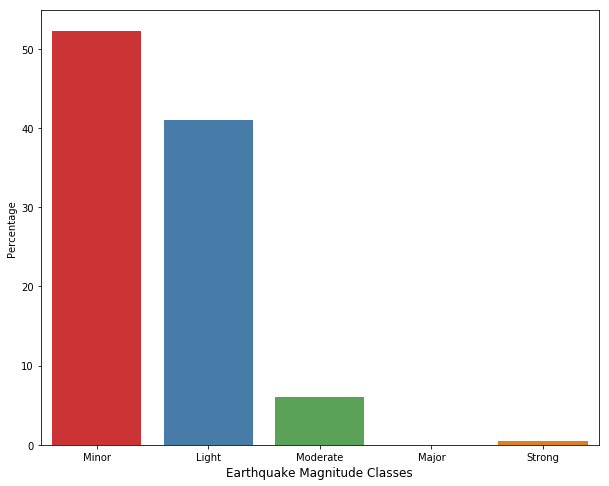

In [93]:
plt.figure(figsize=(10,8))
sns.barplot(df_size_class.index,df_size_class.percent, palette="Set1", order = ['Minor','Light','Moderate',
                                                                                     'Major',
                                                                                    'Strong'])
plt.ylabel('Percentage')
plt.xlabel('Earthquake Magnitude Classes', fontsize=12)
plt.savefig('magnitude_classes_andaman.png')

In [94]:
mag_class = []
for magnitude in df.magnitude:
    if magnitude >= 3.0 and magnitude <=3.9:
        mag_class.append("3-3.9")
    elif magnitude >=4.0 and magnitude <=4.9:
        mag_class.append("4-4.9")
    elif magnitude >=5.0 and magnitude <=5.9:
        mag_class.append("5-5.9")
    elif magnitude >=6.0 and magnitude <=6.9:
        mag_class.append("6-6.9")
    elif magnitude >=7.0 and magnitude <=7.9:
        mag_class.append("7-7.9")
    else:
        mag_class.append("Above 8")
df['mag_class'] = mag_class

In [95]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
group_by_year = pd.DataFrame(df.magnitude.groupby([df['DATE'].dt.year]).count())
group_by_year.columns = ['Frequency']

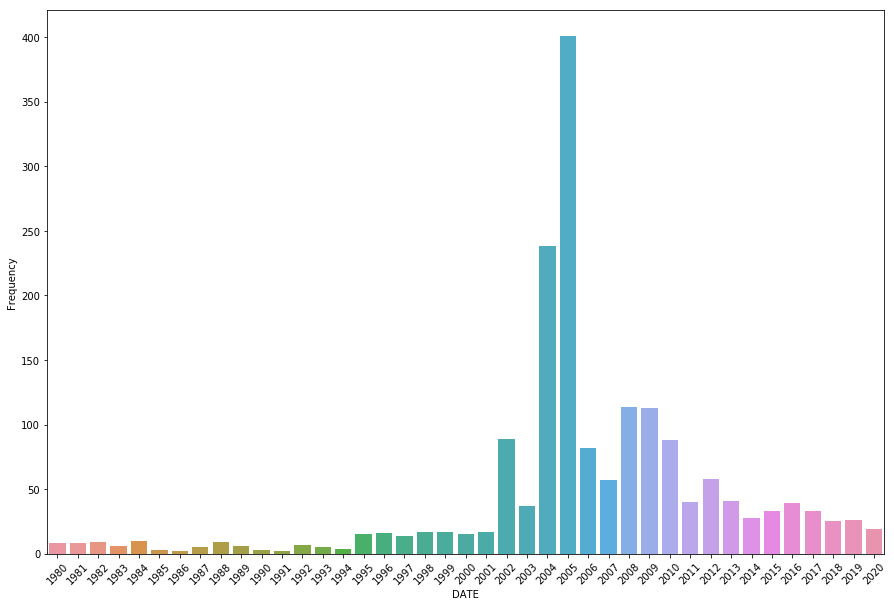

In [96]:
plt.figure(figsize=(15,10))
by_year = sns.barplot(x=group_by_year.index, y=group_by_year.Frequency)
by_year.set_xticklabels(by_year.get_xticklabels(),rotation=45)
plt.savefig('yearly_eq_andaman.png')

In [97]:
df.head()

,year,month,date,Time,latitude,longitude,depth,magnitude,DATE,mag_class
0,1980,2,21,16:05:50,10.5276,92.9652,78.7,4.6,1980-02-21,4-4.9
1,1980,5,26,11:37:30,11.0789,92.8553,43.2,4.8,1980-05-26,4-4.9
2,1980,8,20,6:21:54,11.0277,92.9682,54.0,5.0,1980-08-20,5-5.9
3,1980,9,29,0:18:31,13.0346,93.0987,32.0,4.5,1980-09-29,4-4.9
4,1980,10,31,8:01:10,12.2750,92.8534,41.0,4.6,1980-10-31,4-4.9


In [99]:
df.drop(['mag_class'],axis=1,inplace=True)
df.head()

,year,month,date,Time,latitude,longitude,depth,magnitude,DATE
0,1980,2,21,16:05:50,10.5276,92.9652,78.7,4.6,1980-02-21
1,1980,5,26,11:37:30,11.0789,92.8553,43.2,4.8,1980-05-26
2,1980,8,20,6:21:54,11.0277,92.9682,54.0,5.0,1980-08-20
3,1980,9,29,0:18:31,13.0346,93.0987,32.0,4.5,1980-09-29
4,1980,10,31,8:01:10,12.2750,92.8534,41.0,4.6,1980-10-31


In [101]:
df.to_csv(r'Andaman.csv', index = False)